In [3]:
from manifold_learning import IMD
import numpy as np
from FastCCM import CCM, CCM_utils
from manifold_learning.utils import utils
from manifold_learning.data.data_loader import load_csv_dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from manifold_learning import imd_nd_smap
import importlib
import scipy.cluster.hierarchy as sch
import seaborn as sns
importlib.reload(imd_nd_smap)
importlib.reload(CCM)

<module 'FastCCM.CCM' from '/home/iaroslav/Documents/Python projects/FastCCM/src/FastCCM/CCM.py'>

In [4]:

from matplotlib.colors import LinearSegmentedColormap

def plot_pairwise_arrows_with_direction_gradient(ax,pairwise_matrix, strength_matrix, points, start_color='blue', end_color='red', steps=100):
    """
    Plots arrows between points based on a pairwise matrix, with arrow color as a gradient
    from start_color to end_color and width determined by connection strength. Points are plotted in black.

    Parameters:
    - pairwise_matrix (ndarray): Boolean matrix indicating direction of connections (True/False).
    - strength_matrix (ndarray): Numeric matrix indicating strength of connections.
    - points (ndarray): Coordinates of points as an (N, 2) array.
    - start_color (str): Color of the arrow's start.
    - end_color (str): Color of the arrow's end.
    - steps (int): Number of gradient segments.

    Returns:
    - None
    """

    # Normalize strength matrix for line width scaling
    min_strength = np.min(strength_matrix[strength_matrix > 0])
    max_strength = np.max(strength_matrix)
    normalize_strength = lambda s: (s - min_strength) / (max_strength - min_strength) + 0.1

    # Plot the points in black
    ax.scatter(points[:, 0], points[:, 1], color='black', s=50, zorder=5)

    # Plot the arrows
    for i in range(pairwise_matrix.shape[0]):
        for j in range(pairwise_matrix.shape[1]):
            if pairwise_matrix[i, j]:  # Check if there's a connection
                start = points[i]
                end = points[j]
                strength = strength_matrix[i, j]
                width = normalize_strength(strength)  # Scale the width based on strength
                gradient_arrow(ax, start, end, start_color, end_color, width, steps)

    # Customize plot
    #ax.set_xlim(points[:, 0].min() - 0.5, points[:, 0].max() + 0.5)
    #ax.set_ylim(points[:, 1].min() - 0.5, points[:, 1].max() + 0.5)
    #ax.set_aspect('equal', adjustable='datalim')
    ax.set_title('Pairwise Connections with Gradient-Colored Arrows and Points')
    plt.grid()
    plt.show()

def gradient_arrow(ax, start, end, start_color, end_color, width, steps):
    """
    Draws a single arrow with a gradient color and adjustable width.

    Parameters:
    - ax: Matplotlib axis object.
    - start (tuple): Starting point (x, y).
    - end (tuple): Ending point (x, y).
    - start_color (str): Start color of the arrow.
    - end_color (str): End color of the arrow.
    - width (float): Width of the arrow lines.
    - steps (int): Number of gradient segments.
    """
    cmap = LinearSegmentedColormap.from_list('gradient', [start_color, end_color])
    for t in np.linspace(0, 1, steps):
        intermediate_start = (1 - t) * np.array(start) + t * np.array(end)
        intermediate_end = (1 - (t + 1 / steps)) * np.array(start) + (t + 1 / steps) * np.array(end)
        ax.plot(
            [intermediate_start[0], intermediate_end[0]],
            [intermediate_start[1], intermediate_end[1]],
            color=cmap(t),
            lw=width*10,
            solid_capstyle='round',
        )

In [5]:
X = np.loadtxt("../src/manifold_learning/data/datasets/xco2_v2_gradient_diff.txt")


In [8]:
observables = StandardScaler().fit_transform(X)

In [11]:
observables_test = observables
observables_train= observables

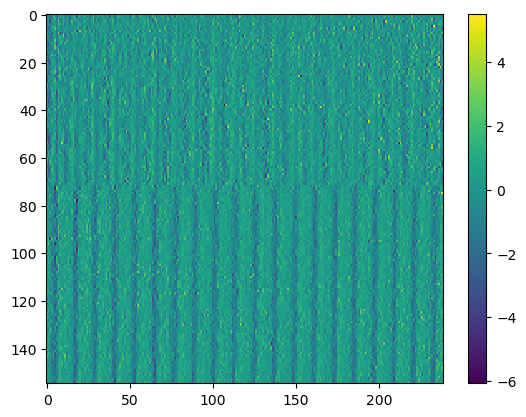

In [12]:
plt.imshow((observables[:].T),aspect="auto",interpolation="nearest")
plt.colorbar()

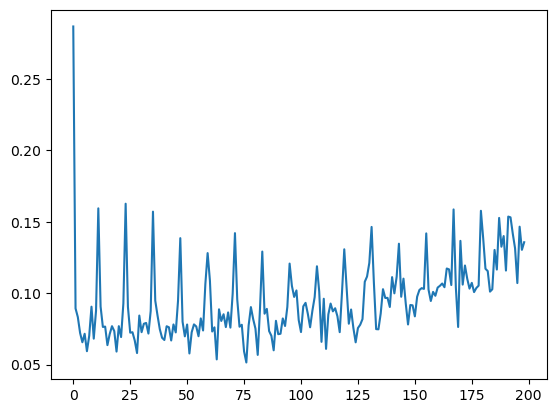

In [14]:
plt.plot(np.mean([[np.abs(np.corrcoef(observables[k:,i], observables[:-k,i])[1,0]) for k in range(1,200)] for i in range(50)],axis=0))

In [16]:
n_exp = 8
n_comp_list = [1,2,3,4,5,6,7,8]
models = []
unmixed_train_all = []
unmixed_test_all = []

for n_comp in n_comp_list:
    for exp in range(n_exp):
        trainer = imd_nd_smap.IMD_nD_smap(observables.shape[1], embed_dim=5, n_components=n_comp, subtract_corr=False, device="cuda")

        trainer.fit(observables_train, sample_len=120, library_len=200, 
                exclusion_rad=6, theta=5, tp=4, 
                epochs=200, num_batches=32,optimizer="Adagrad", learning_rate=0.01, tp_policy="range",loss_mask_size=3 if n_comp > 3 else None)
        models += [trainer.model]


        unmixed_train = trainer.predict(observables_train)
        unmixed_test = trainer.predict(observables_test)
        unmixed_train_all += [unmixed_train.copy()]
        unmixed_test_all += [unmixed_test.copy()]


Epoch 1/200, Loss: 0.9842
Epoch 2/200, Loss: 0.8819
Epoch 3/200, Loss: 0.6915
Epoch 4/200, Loss: 0.5029
Epoch 5/200, Loss: 0.3933
Epoch 6/200, Loss: 0.3329
Epoch 7/200, Loss: 0.3027
Epoch 8/200, Loss: 0.2619
Epoch 9/200, Loss: 0.2416
Epoch 10/200, Loss: 0.2219
Epoch 11/200, Loss: 0.1999
Epoch 12/200, Loss: 0.1950
Epoch 13/200, Loss: 0.1770
Epoch 14/200, Loss: 0.1717
Epoch 15/200, Loss: 0.1682
Epoch 16/200, Loss: 0.1636
Epoch 17/200, Loss: 0.1591
Epoch 18/200, Loss: 0.1539
Epoch 19/200, Loss: 0.1479
Epoch 20/200, Loss: 0.1406
Epoch 21/200, Loss: 0.1366
Epoch 22/200, Loss: 0.1323
Epoch 23/200, Loss: 0.1327
Epoch 24/200, Loss: 0.1291
Epoch 25/200, Loss: 0.1270
Epoch 26/200, Loss: 0.1163
Epoch 27/200, Loss: 0.1173
Epoch 28/200, Loss: 0.1125
Epoch 29/200, Loss: 0.1107
Epoch 30/200, Loss: 0.1087
Epoch 31/200, Loss: 0.1067
Epoch 32/200, Loss: 0.1062
Epoch 33/200, Loss: 0.1039
Epoch 34/200, Loss: 0.1065
Epoch 35/200, Loss: 0.0997
Epoch 36/200, Loss: 0.0979
Epoch 37/200, Loss: 0.1010
Epoch 38/2

---

In [17]:
unmixed_train_all_concat = np.concatenate([np.transpose(i,(1,0,2)) for i in unmixed_train_all])
unmixed_test_all_concat = np.concatenate([np.transpose(i,(1,0,2)) for i in unmixed_test_all])

In [165]:

ccm_unmixed_train = CCM.PairwiseCCM().compute(unmixed_train_all_concat,unmixed_train_all_concat,200,200,10,0,method="simplex",nbrs_num=5,).mean(axis=0)
ccm_unmixed_test = CCM.PairwiseCCM().compute(unmixed_test_all_concat,unmixed_test_all_concat,200,200,10,0,method="simplex",nbrs_num=5,).mean(axis=0)

ccm_unmixed_train[ccm_unmixed_train<0]=0
ccm_unmixed_test[ccm_unmixed_test<0]=0


In [166]:
unmixed_xmap_X_train = CCM.PairwiseCCM().compute(unmixed_train_all_concat,observables_train.T[:,:,None],200,200,10,0,method="simplex",nbrs_num=5,).mean(axis=0)
unmixed_xmap_X_train[unmixed_xmap_X_train<0]=0




/home/iaroslav/miniconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/iaroslav/miniconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


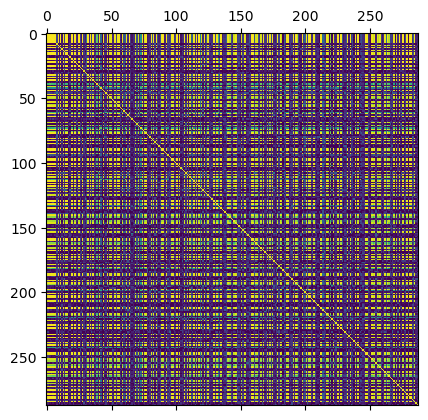

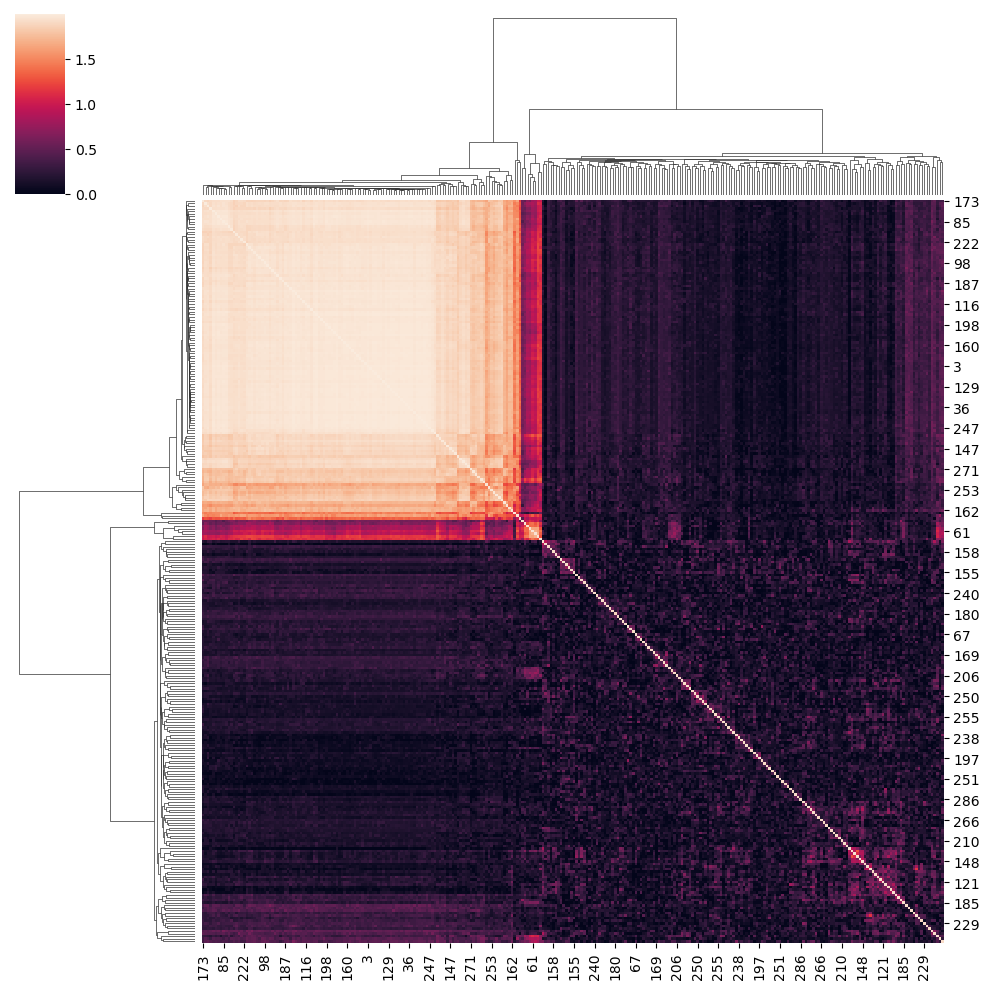

In [167]:


plt.matshow(ccm_unmixed_train,vmin=0,vmax=1)

# Generate the clustermap and get the linkage matrix for the columns
clustermap = sns.clustermap(ccm_unmixed_train + ccm_unmixed_train.T,method="average", col_cluster=True)
col_linkage = clustermap.dendrogram_col.linkage

n_clusters = 3
col_clusters = sch.cut_tree(col_linkage, n_clusters=n_clusters).flatten()

# Initialize a dictionary to store the barycenter variable for each cluster
barycenter_vars = []

# Iterate through each cluster
for cluster in range(n_clusters):
    # Get the indices of columns in this cluster
    cluster_indices = np.where(col_clusters == cluster)[0]
    
    # Extract the submatrix for this cluster
    cluster_matrix = ccm_unmixed_train[np.ix_(cluster_indices, cluster_indices)]
    
    # Calculate the average correlation for each variable in the cluster
    avg_correlations = cluster_matrix.mean(axis=1)
    
    # Find the index of the variable with the highest average correlation
    closest_variable_idx = cluster_indices[np.argmax(avg_correlations)]
    
    # Store the result
    barycenter_vars += [closest_variable_idx]
barycenter_vars = np.array(barycenter_vars)

ccm_unmixed_train_reduced = np.array([[ccm_unmixed_train[col_clusters==j][:,col_clusters==i].mean() for i in range(col_clusters.max()+1)] for j in range(col_clusters.max()+1)])

ccm_unmixed_train_reduced = CCM.PairwiseCCM().compute(unmixed_train_all_concat[barycenter_vars],unmixed_train_all_concat[barycenter_vars],200,200,10,0,method="simplex",nbrs_num=5,).mean(axis=0)
ccm_unmixed_train_reduced[ccm_unmixed_train_reduced<0]=0

unmixed_xmap_X_train_reduced = CCM.PairwiseCCM().compute(unmixed_train_all_concat[barycenter_vars],observables_train.T[:,:,None],200,200,10,0,method="simplex",nbrs_num=5,).mean(axis=0)
unmixed_xmap_X_train_reduced[unmixed_xmap_X_train_reduced<0]=0

unmixed_xmap_X_test_reduced = CCM.PairwiseCCM().compute(unmixed_test_all_concat[barycenter_vars],observables_test.T[:,:,None],200,200,10,0,method="simplex",nbrs_num=5,).mean(axis=0)
unmixed_xmap_X_test_reduced[unmixed_xmap_X_test_reduced<0]=0

/home/iaroslav/miniconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/iaroslav/miniconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


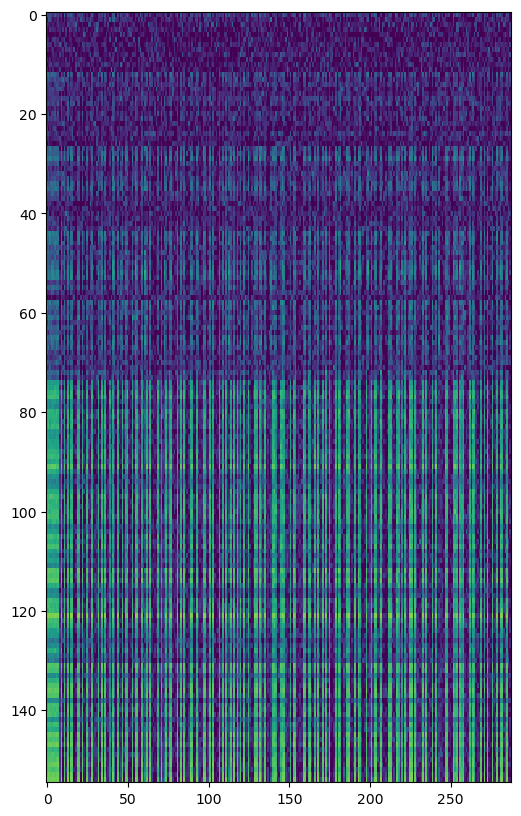

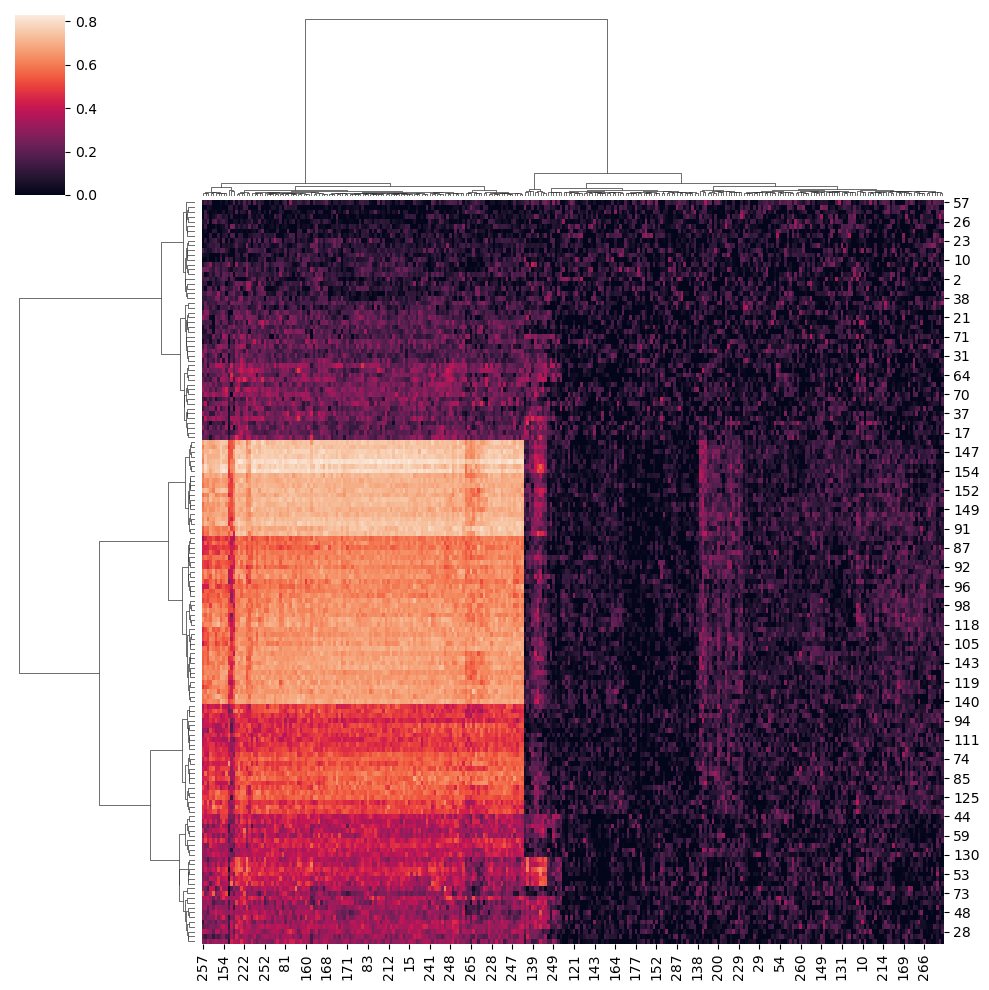

In [168]:
plt.figure(figsize=(6,10))

plt.imshow(unmixed_xmap_X_train,vmin=0,vmax=1,aspect="auto",interpolation="nearest")

sns.clustermap(unmixed_xmap_X_train, method="ward")

In [169]:

import umap
reducer = umap.UMAP(metric='precomputed', n_neighbors=25, min_dist=0.1, n_components=2, random_state=10)
X_umap = reducer.fit_transform(2-(ccm_unmixed_train+ccm_unmixed_train.T))

/home/iaroslav/miniconda3/lib/python3.12/site-packages/umap/umap_.py:1858: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/home/iaroslav/miniconda3/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


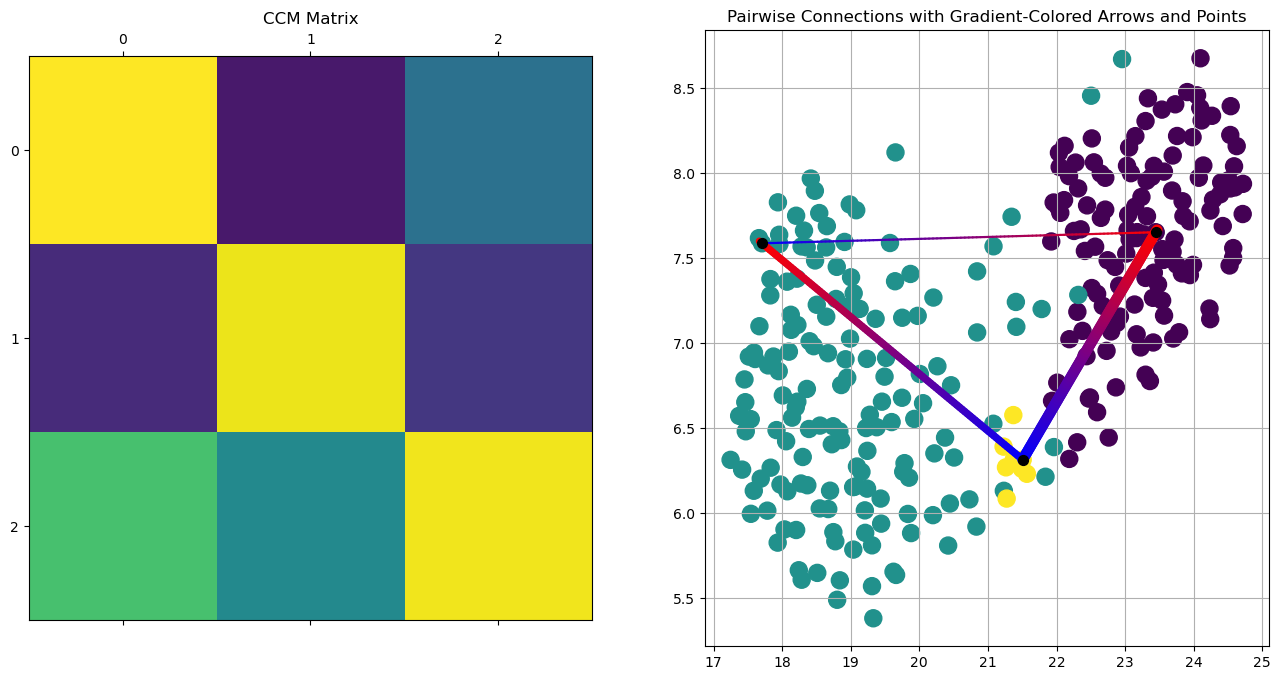

<Figure size 640x480 with 0 Axes>

In [170]:

# Create subplots with 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # (1 row, 2 columns)

# Plot the first subplot (matshow)
axes[0].matshow(ccm_unmixed_train_reduced, vmax=1, vmin=0)
axes[0].set_title("CCM Matrix")

# Plot the second subplot (scatter and arrows)
scatter_ax = axes[1]
scatter_ax.scatter(
    X_umap[:, 0], X_umap[:, 1],
    c=col_clusters,
    cmap='viridis',
    s=150
)
scatter_ax.set_title("Scatter with Arrows")

# Call the custom function for arrows
plot_pairwise_arrows_with_direction_gradient(
    scatter_ax,
    (ccm_unmixed_train_reduced > 0.1),
    ccm_unmixed_train_reduced,
    X_umap[barycenter_vars]
)

# Adjust layout for better appearance
plt.tight_layout()
# Show the plots
plt.show()

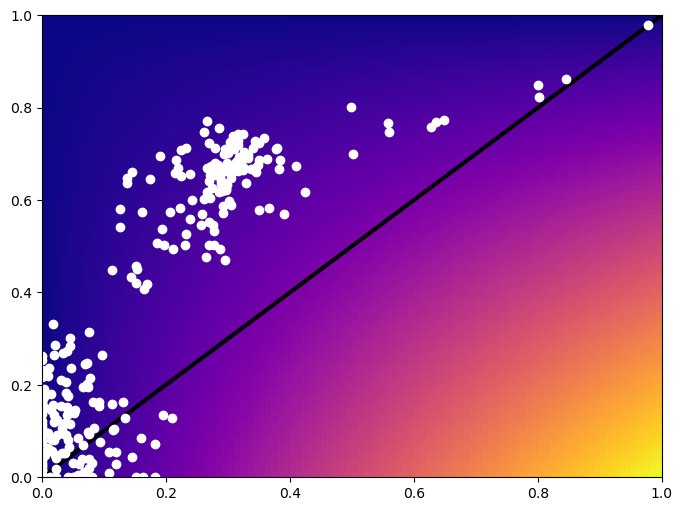

In [171]:


bx = np.linspace(0, 1, 100)
by = np.linspace(1, 0, 100)
gradient = np.outer(by,bx)  

fig, ax = plt.subplots(figsize=(8, 6))

ax.imshow(gradient, extent=[0, 1, 0, 1], origin='lower', aspect='auto', cmap='plasma')

ax.plot([0, 1], [0, 1], color="black", lw=3)
ax.scatter(ccm_unmixed_train[:,barycenter_vars[2]],ccm_unmixed_train[barycenter_vars[2]],c="white",zorder=2)


In [172]:
density = np.sort(ccm_unmixed_train+ccm_unmixed_train.T,axis=1)[:,-20:-1].mean(axis=1)/2

array([0.9919561 , 0.99128944, 0.9914114 , 0.9913745 , 0.99150264,
       0.9911791 , 0.9911561 , 0.9906044 , 0.23920031, 0.99025416,
       0.24119172, 0.99175996, 0.20877342, 0.9896454 , 0.24175473,
       0.9913847 , 0.99186414, 0.19817317, 0.21769717, 0.9907156 ,
       0.9921278 , 0.18818645, 0.9915133 , 0.20087183, 0.25354934,
       0.98974055, 0.23205109, 0.25221816, 0.9920185 , 0.17554866,
       0.21726795, 0.2728792 , 0.9913045 , 0.24545276, 0.99134886,
       0.21521553, 0.9916339 , 0.22463831, 0.18519548, 0.7735721 ,
       0.1894956 , 0.9578042 , 0.53333557, 0.19202036, 0.98872006,
       0.33823165, 0.35267878, 0.9908525 , 0.23367456, 0.94676286,
       0.9311327 , 0.24600303, 0.2151626 , 0.9738883 , 0.25225645,
       0.9354764 , 0.97511554, 0.2800087 , 0.29729536, 0.9680161 ,
       0.22023252, 0.6321909 , 0.98583883, 0.2928653 , 0.9922535 ,
       0.20046696, 0.23356704, 0.19844942, 0.21248807, 0.9569501 ,
       0.24774413, 0.91745204, 0.2107147 , 0.6638848 , 0.98823

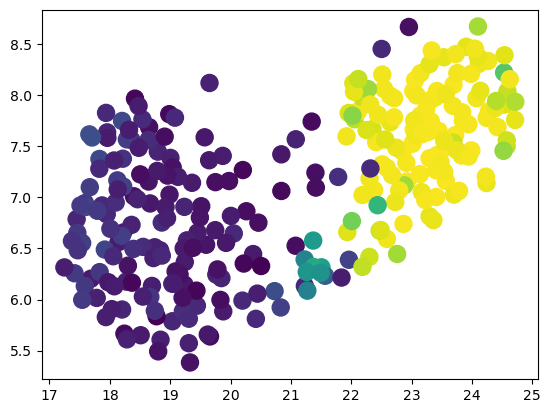

In [173]:
plt.scatter(X_umap[:, 0], X_umap[:, 1],c=density, cmap='viridis', s=150,vmax=1)
density

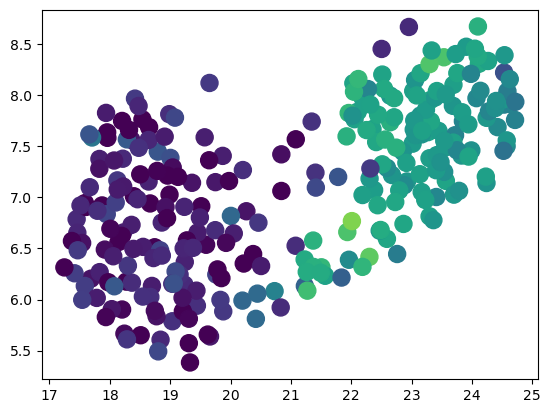

In [174]:

plt.scatter(X_umap[:, 0], X_umap[:, 1],c=(CCM.PairwiseCCM().compute(unmixed_train_all_concat,
PCA(10).fit_transform(observables_train[:,:62]).T[:,:,None],1500,600,60,0,method="simplex",nbrs_num=10,).mean(axis=0))[0], cmap='viridis', s=150,vmin=0,vmax=1)


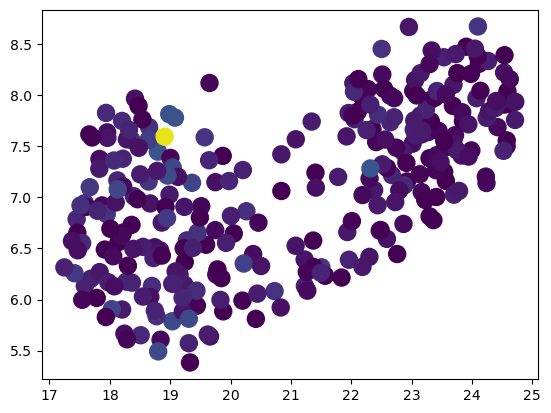

In [175]:


# Plot the results
#plt.scatter(X_umap[:, 0], X_umap[:, 1],c=np.repeat([1,2,3,4,5,6,7,8],np.array([1,2,3,4,5,6,7,8])*6), cmap='viridis', s=50)

plt.scatter(X_umap[:, 0], X_umap[:, 1],c=ccm_unmixed_train[-2], cmap='viridis', s=150,vmax=1,vmin=0)

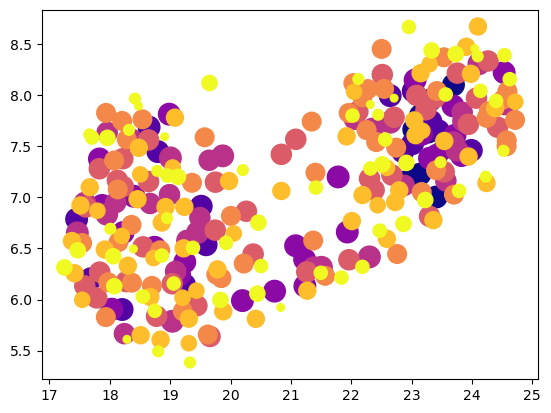

In [176]:

plt.scatter(X_umap[:, 0], X_umap[:, 1],c=np.repeat(n_comp_list,np.array(n_comp_list)*8), cmap='plasma', s=30 * np.repeat(n_comp_list,np.array(n_comp_list)*8)[::-1])

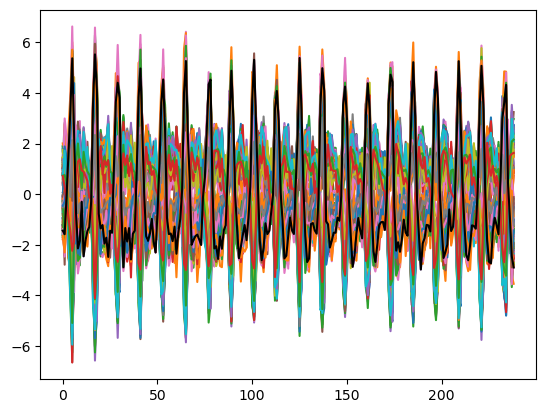

In [177]:
plt.plot(unmixed_train_all_concat[col_clusters==0][:,:,0].T)
plt.plot(unmixed_train_all_concat[barycenter_vars[0]][:,0],color="black")

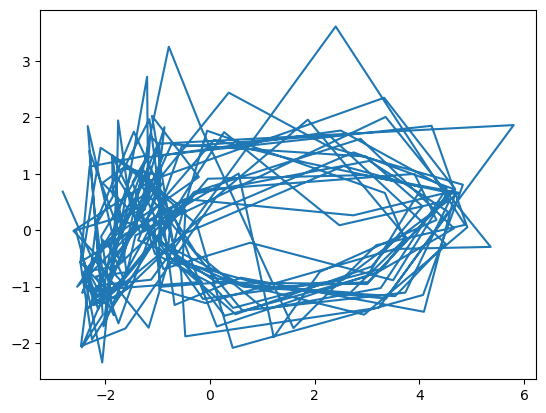

In [178]:
plt.plot(unmixed_train_all_concat[barycenter_vars[0]][:,1],unmixed_train_all_concat[barycenter_vars[2]][:,1],)

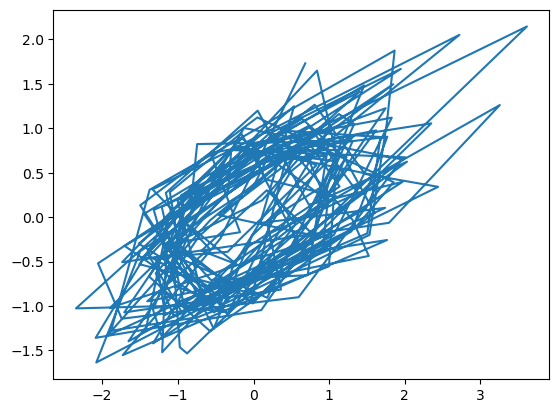

In [179]:
plt.plot(unmixed_train_all_concat[barycenter_vars[2]][:,1],unmixed_train_all_concat[barycenter_vars[2]][:,0],)

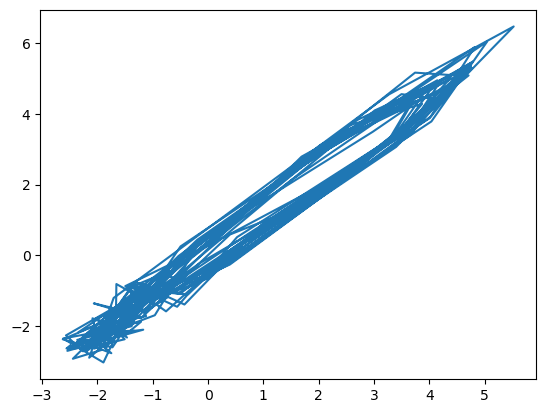

In [180]:
plt.plot(unmixed_train_all_concat[barycenter_vars[0]][:,3],unmixed_train_all_concat[barycenter_vars[0]][:,4],)

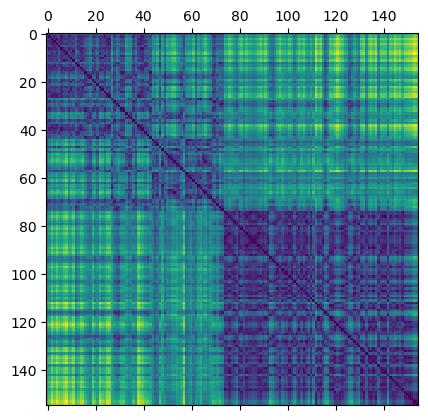

In [181]:
from sklearn.metrics import pairwise_distances
plt.matshow(pairwise_distances(unmixed_xmap_X_test_reduced))

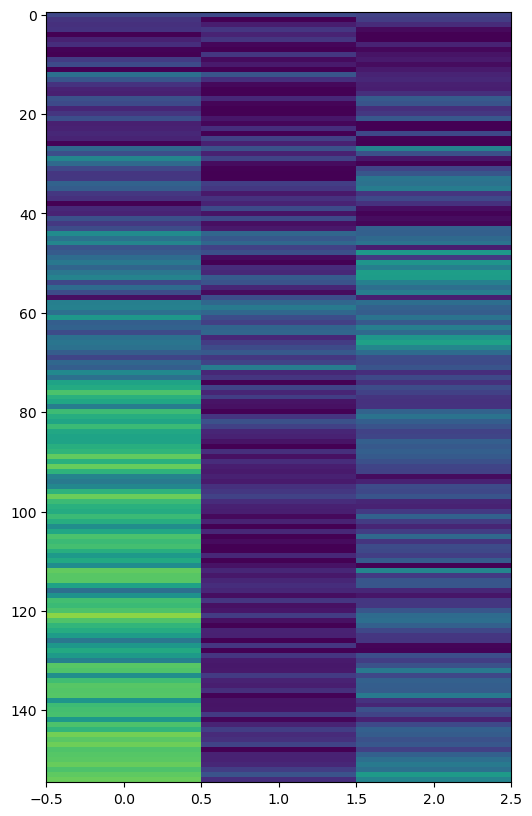

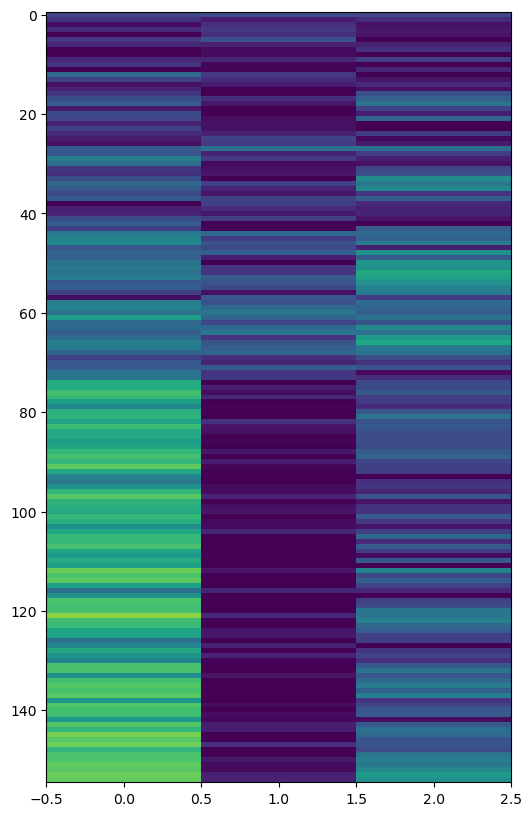

In [203]:

plt.figure(figsize=(6,10))

plt.imshow(unmixed_xmap_X_train_reduced,vmin=0,vmax=1,aspect="auto",interpolation="nearest")

plt.figure(figsize=(6,10))

plt.imshow(unmixed_xmap_X_test_reduced,vmin=0,vmax=1,aspect="auto",interpolation="nearest")


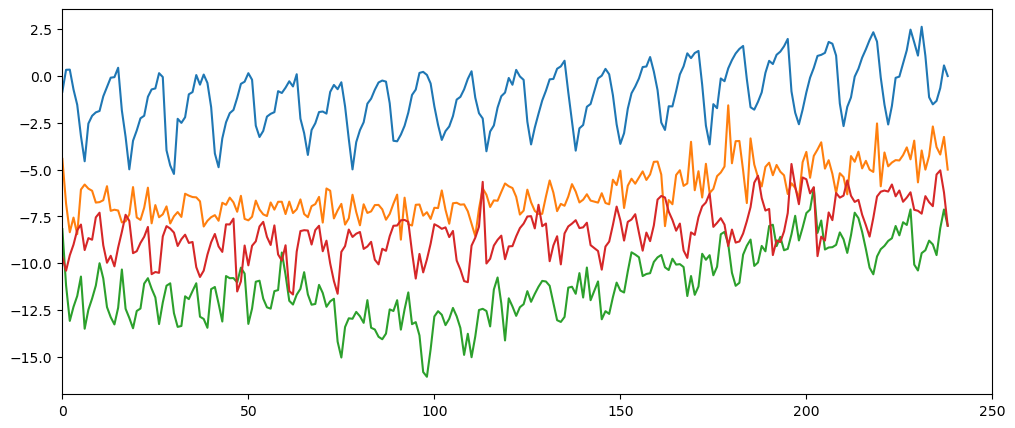

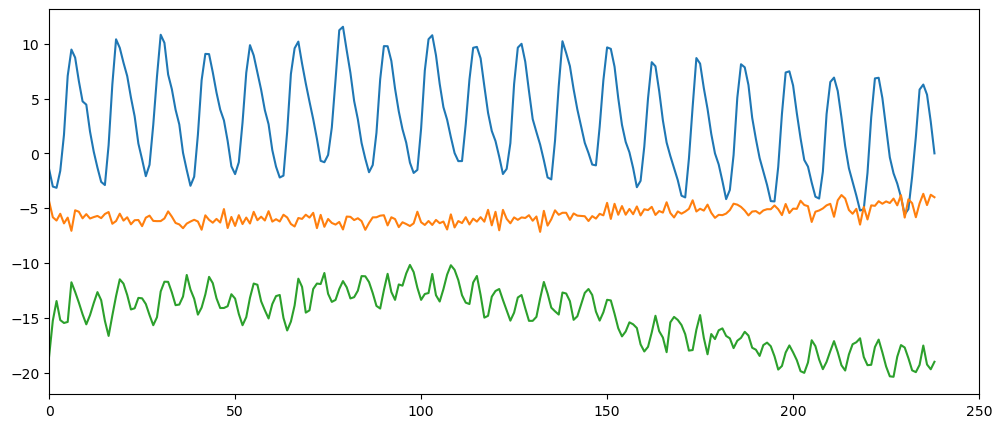

In [164]:
plt.figure(figsize=(12,5))
plt.plot(np.cumsum(observables[:,121]))
plt.plot(np.cumsum(observables[:,6])-5)
plt.plot(np.cumsum(observables[:,51])-8)
plt.plot(np.cumsum(observables[:,70])-8)
plt.xlim(0,250)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(np.cumsum(unmixed_train_all_concat[barycenter_vars[0]][:,0]))
plt.plot(np.cumsum(unmixed_train_all_concat[barycenter_vars[1]][:,0])-4)
plt.plot(np.cumsum(unmixed_train_all_concat[barycenter_vars[2]][:,1])-19)
plt.xlim(0,250)
plt.show()

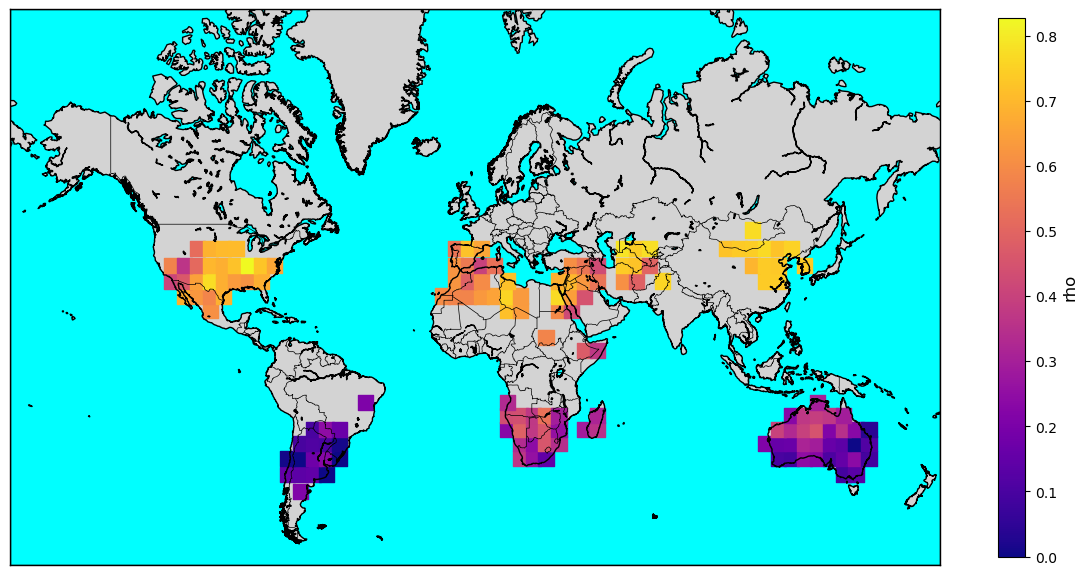

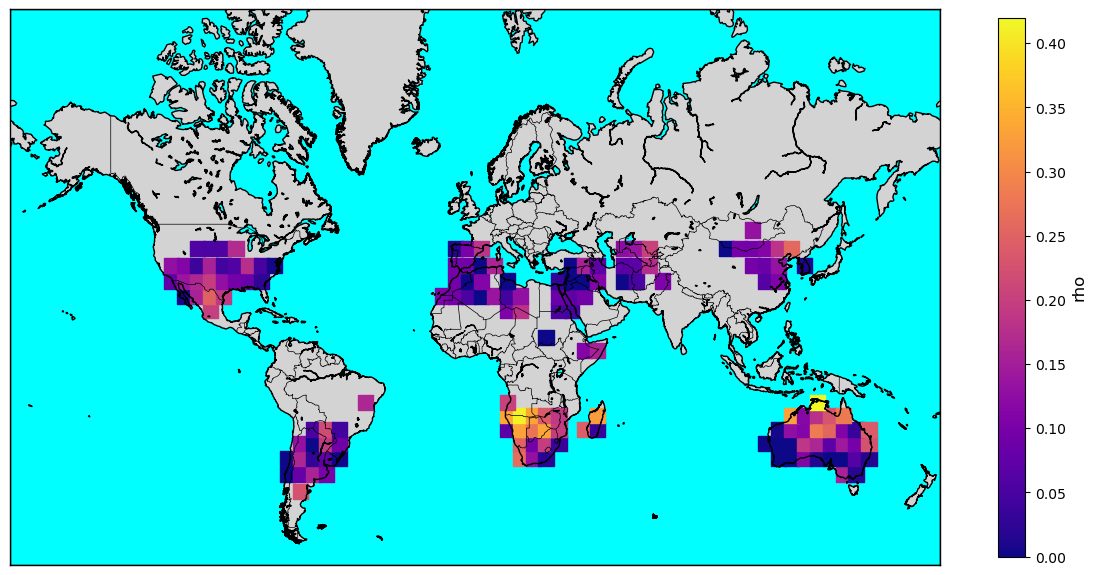

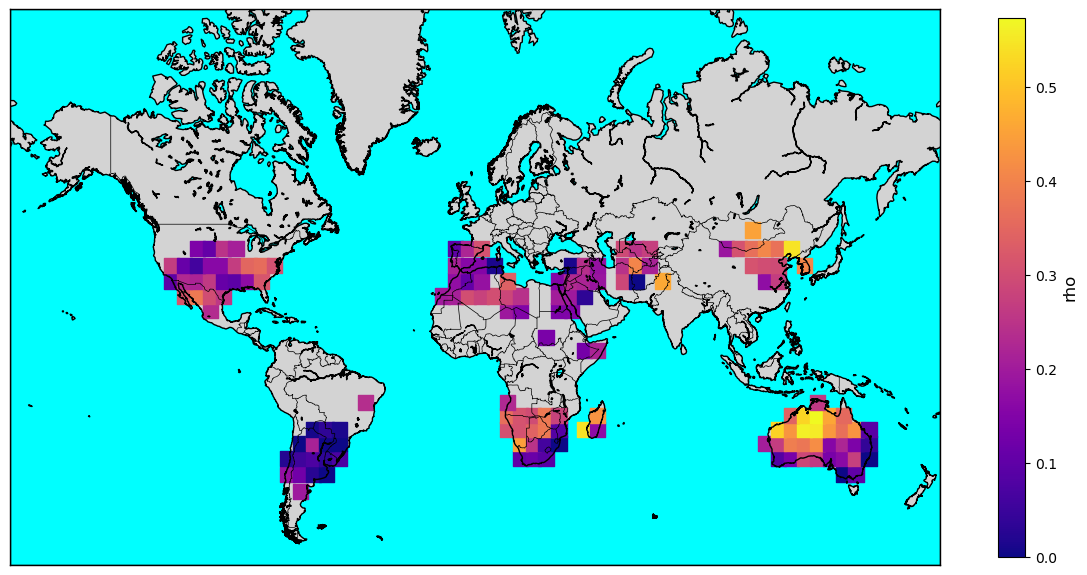

In [204]:
from mpl_toolkits.basemap import Basemap

# Simplex coordinates and values
locations = [
    (-42.5, -67.5), (-37.5, -72.5), (-37.5, -67.5), (-37.5, -62.5), (-37.5, -57.5),
    (-37.5, 142.5), (-37.5, 147.5), (-32.5, -72.5), (-32.5, -67.5), (-32.5, -62.5),
    (-32.5, -57.5), (-32.5, -52.5), (-32.5, 17.5), (-32.5, 22.5), (-32.5, 27.5),
    (-32.5, 117.5), (-32.5, 122.5), (-32.5, 127.5), (-32.5, 132.5), (-32.5, 137.5),
    (-32.5, 142.5), (-32.5, 147.5), (-32.5, 152.5), (-27.5, -67.5), (-27.5, -62.5),
    (-27.5, -57.5), (-27.5, -52.5), (-27.5, 17.5), (-27.5, 22.5), (-27.5, 27.5),
    (-27.5, 32.5), (-27.5, 112.5), (-27.5, 117.5), (-27.5, 122.5), (-27.5, 127.5),
    (-27.5, 132.5), (-27.5, 137.5), (-27.5, 142.5), (-27.5, 147.5), (-27.5, 152.5),
    (-22.5, -62.5), (-22.5, -57.5), (-22.5, -52.5), (-22.5, 12.5), (-22.5, 17.5),
    (-22.5, 22.5), (-22.5, 27.5), (-22.5, 32.5), (-22.5, 42.5), (-22.5, 47.5),
    (-22.5, 117.5), (-22.5, 122.5), (-22.5, 127.5), (-22.5, 132.5), (-22.5, 137.5),
    (-22.5, 142.5), (-22.5, 147.5), (-22.5, 152.5), (-17.5, 12.5), (-17.5, 17.5),
    (-17.5, 22.5), (-17.5, 27.5), (-17.5, 32.5), (-17.5, 47.5), (-17.5, 122.5),
    (-17.5, 127.5), (-17.5, 132.5), (-17.5, 137.5), (-17.5, 142.5), (-12.5, -42.5),
    (-12.5, 12.5), (-12.5, 132.5), (7.5, 42.5), (7.5, 47.5), (12.5, 27.5),
    (22.5, -102.5), (22.5, 12.5), (22.5, 17.5), (22.5, 32.5), (22.5, 37.5),
    (27.5, -112.5), (27.5, -107.5), (27.5, -102.5), (27.5, -97.5), (27.5, -12.5),
    (27.5, -7.5), (27.5, -2.5), (27.5, 2.5), (27.5, 7.5), (27.5, 12.5), (27.5, 17.5),
    (27.5, 32.5), (27.5, 37.5), (27.5, 42.5), (32.5, -117.5), (32.5, -112.5),
    (32.5, -107.5), (32.5, -102.5), (32.5, -97.5), (32.5, -92.5), (32.5, -87.5),
    (32.5, -82.5), (32.5, -7.5), (32.5, -2.5), (32.5, 2.5), (32.5, 12.5),
    (32.5, 32.5), (32.5, 37.5), (32.5, 42.5), (32.5, 47.5), (32.5, 57.5), (32.5, 62.5),
    (32.5, 72.5), (32.5, 112.5), (32.5, 117.5), (37.5, -117.5), (37.5, -112.5),
    (37.5, -107.5), (37.5, -102.5), (37.5, -97.5), (37.5, -92.5), (37.5, -87.5),
    (37.5, -82.5), (37.5, -77.5), (37.5, -7.5), (37.5, -2.5), (37.5, 2.5),
    (37.5, 7.5), (37.5, 37.5), (37.5, 42.5), (37.5, 47.5), (37.5, 57.5),
    (37.5, 62.5), (37.5, 67.5), (37.5, 107.5), (37.5, 112.5), (37.5, 117.5),
    (37.5, 127.5), (42.5, -107.5), (42.5, -102.5), (42.5, -97.5), (42.5, -92.5),
    (42.5, -7.5), (42.5, -2.5), (42.5, 2.5), (42.5, 57.5), (42.5, 62.5),
    (42.5, 67.5), (42.5, 97.5), (42.5, 102.5), (42.5, 107.5), (42.5, 112.5),
    (42.5, 117.5), (42.5, 122.5), (47.5, 107.5)
]

for i in range(3):
    plt.figure(figsize=(15,10))
    # Initialize map
    map = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='l')

    # Draw map features
    map.drawcoastlines()
    map.drawcountries()
    map.drawmapboundary(fill_color='aqua')
    map.fillcontinents(color='lightgrey', lake_color='aqua')

    # Scatter plot with color map
    lats,lons = zip(*locations)
    x, y = map(lons, lats)
    sc = map.scatter(x, y, c=unmixed_xmap_X_train_reduced[:,i], cmap='plasma', s=120, marker="s")

    # Add color bar
    cbar = plt.colorbar(sc, orientation='vertical', shrink=0.7)
    cbar.set_label('rho', fontsize=12)

    plt.title("", fontsize=14)
    plt.show()
